# Exploratory Data Analysis

Autor: Gonzalo Schwerdt - Cohorte 10 - Data Science

In [33]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:

dataAvi = pd.read_csv(".\AccidentesAvionesTRANSFORMED.csv",index_col=False)
dataAvi.reset_index(inplace=True)
dataAvi = dataAvi.set_index(dataAvi.columns[0])
dataFin = pd.read_csv(".\AccidentesAvionesFIN.csv")

# Cantidad de Fallecidos - Distribución

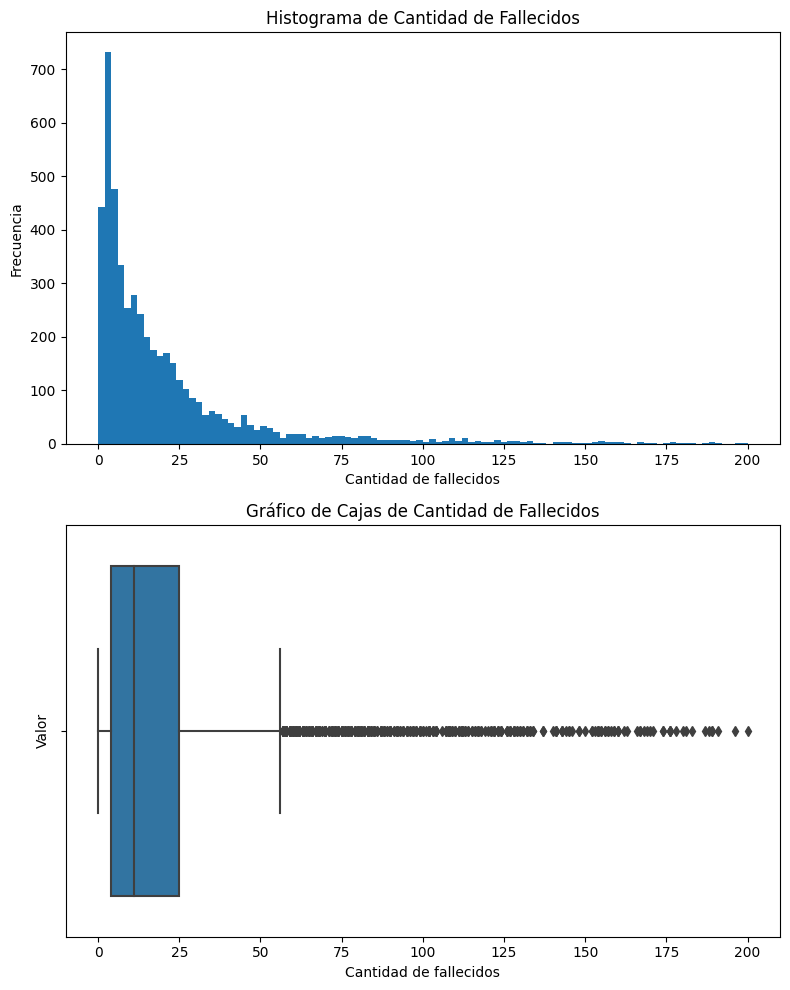

In [35]:

dataFin = dataFin[dataFin['cantidad de fallecidos'] <= 200]
dataFin = dataFin[dataFin['all_aboard'] <= 200]

# Crear figura y ejes
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Gráfico de histograma
axes[0].hist(dataFin['cantidad de fallecidos'], bins=100)
axes[0].set_xlabel('Cantidad de fallecidos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de Cantidad de Fallecidos')

# Gráfico de cajas
sns.boxplot(data=dataFin, x='cantidad de fallecidos', ax=axes[1])
axes[1].set_xlabel('Cantidad de fallecidos')
axes[1].set_ylabel('Valor')
axes[1].set_title('Gráfico de Cajas de Cantidad de Fallecidos')

# Ajustar espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


La mayor parte de las muertes se concentran entre 1 y 62. Los demas datos son outliers.  De todos modos se toman en cuenta ya que contienen mas información pertinente para lo que resta del  análisis

# Distribución de los accidentes a lo largo del día

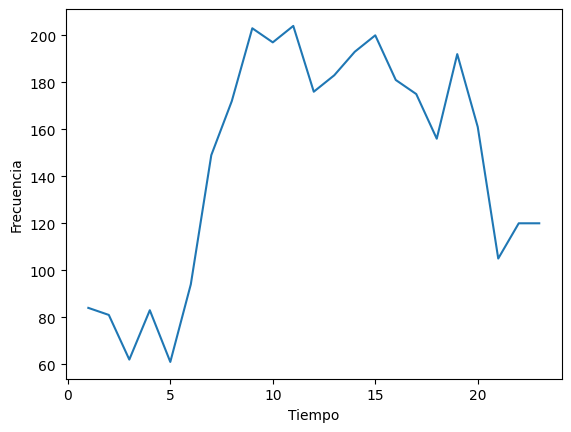

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

dataFin['Hora'] = dataAvi['HORA declarada'].str[:2].apply(int)
data_filtered = dataFin.loc[dataFin['Hora'] != 0]

# Contar la frecuencia de cada valor en la columna "Hora"
counts = data_filtered['Hora'].value_counts().sort_index()

# Crear el gráfico de líneas
sns.lineplot(data=counts)

# Personalizar etiquetas de los ejes
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()



La mayor parte de los accidentes ocurrieron de día, asi que no hay una correlación directa con la visibilidad nocturna y si la misma dificulta la navegación.

# Distribución de accidentes a lo alrgo de los Años

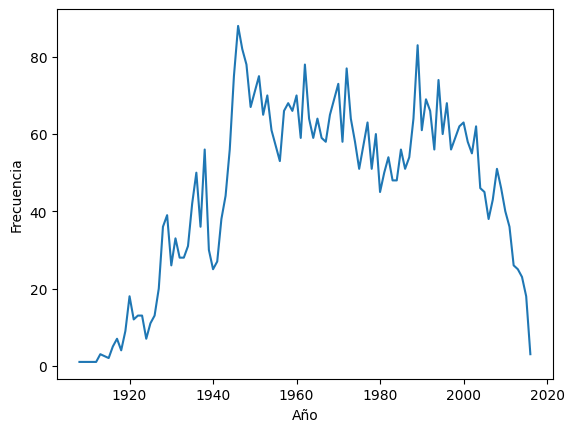

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la columna "fecha" a formato de fecha
dataFin["fecha"] = pd.to_datetime(dataAvi["fecha"])

# Extraer el año de la columna "fecha"
dataFin["año"] = dataFin["fecha"].dt.year

# Contar el número de observaciones en cada año
count_by_año = dataFin["año"].value_counts().sort_index()

# Crear el gráfico de líneas
plt.plot(count_by_año.index, count_by_año.values)

# Personalizar etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()




Algo curioso que se puede notar en dicha distribución es el gran aumento de accidentes aereos en el año 1945. Esto sucede ya que en ese mismo año estaba terminando la 2da Guerra Mundial, donde la tecnología aérea armamentista escaló a grandes números y a su vez las bajas de los mismos.

# Distribución de los accidentes según los meses de los años en promedio

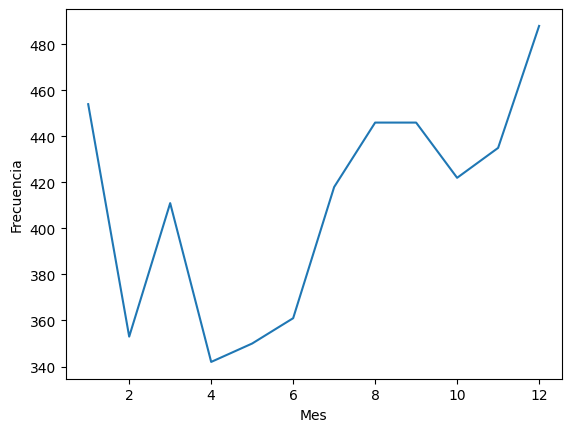

In [38]:
dataFin['Mes'] = dataFin['fecha'].dt.month
data_filtered = dataFin.loc[dataFin['Mes'] != 0]

# Contar la frecuencia de cada valor en la columna "Hora"
counts = data_filtered['Mes'].value_counts().sort_index()

# Crear el gráfico de líneas
sns.lineplot(data=counts)

# Personalizar etiquetas de los ejes
plt.xlabel('Mes')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


Se puede ver un gran aumento de accidentes a partir de Junio para disminuir subitamente, próximamente, en Febrero; con un pico en Marzo.
Es decir, este gráfico indica que Febrero, Abril, Mayo y Junio son los años con menos cantidad de accidentes en promedio.

# Matriz de Correlación - Causa de Accidentes

C:\Users\gonza\AppData\Local\Temp\ipykernel_14636\1863876013.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataFin.drop(columns=["all_aboard","Hora","año","maña","tard","unknown_Hour","noch"]).corr()


Text(0.5, 1.0, 'Matriz de correlación')

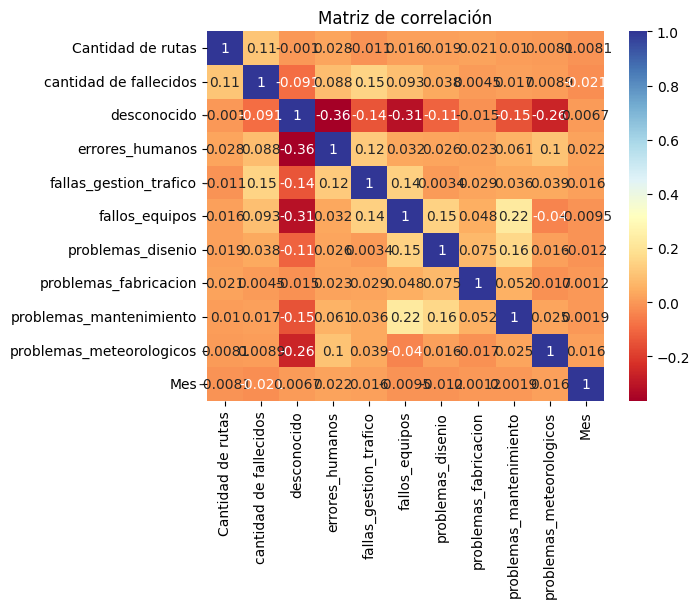

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear matriz de correlación
correlation_matrix = dataFin.drop(columns=["all_aboard","Hora","año","maña","tard","unknown_Hour","noch"]).corr()

# Crear mapa de calor utilizando Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')

# Personalizar el mapa de calor
plt.title('Matriz de correlación')

A simple vista es notoria la correlacion de "desconocido" ya que su presencia tiende a indicar ausencia en las demas variables.
Por otro lado si analizamos con mas profundidad el gráfico podemos notar que hay una sutíl correlacion entre las fallas de gestión de tráfico con la cantidad de fallecidos. Como también una lógica correlacion entre las fallas de equipo y los probelmas de manteniemiento, describiendo así como no tener un buen mantenimiento del avión puede generar fallas en los equipos.

# Mortalidad promedio por cada Causa de Accidentes

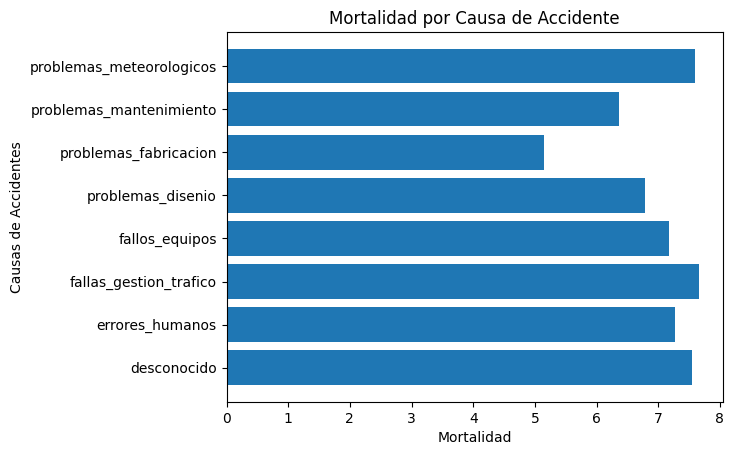

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
dataFin = pd.read_csv(r"C:\Users\gonza\OneDrive\Escritorio\Proyecto Individual\Proyecto_Individual_2\PI03-Analytics\AccidentesAvionesFIN.csv")
def mortalidad(dataFin):
    listColumns = ["desconocido","errores_humanos","fallas_gestion_trafico","fallos_equipos","problemas_disenio","problemas_fabricacion","problemas_mantenimiento","problemas_meteorologicos"]
    mortalidades = []  # Lista para almacenar las mortalidades
    for column in listColumns:
        sumaM = 0
        sumaS = 0
        for index, row in dataFin.iterrows():
            # Verifica si el valor es igual a 1
            if row[column] == 1:
                # Reemplaza el valor por la cantidad de fallecidos de la misma fila
                sumaM += row["cantidad de fallecidos"]
                sumaS += row["all_aboard"]
        mortalidades.append(round((sumaM/sumaS)*10, 2))

    # Crear el gráfico de barras
    fig, ax = plt.subplots()
    ax.barh(listColumns, mortalidades)
    ax.set_xlabel('Mortalidad')
    ax.set_ylabel('Causas de Accidentes')
    ax.set_title('Mortalidad por Causa de Accidente')

    plt.show()
mortalidad(dataFin)

Podemos apreciar que las Causas mas mortales son sutilmente las originadas por problemas metereológicos y fallas de gestión de tráfico. Las demás tienen valores similares pero inferiores. Además describe que los problemas de fabricación, por diferencia, son los menos mortales en torno a la poblacion total.